In [42]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yahooquery as yq
import random

import matplotlib.pyplot as plt
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

from ConformalMethods import AdaptiveCP, ACP_plots, ACP_data

# I will test how Chebyshev faces against no shift

In [43]:
no_shift = ACP_data.no_shift()


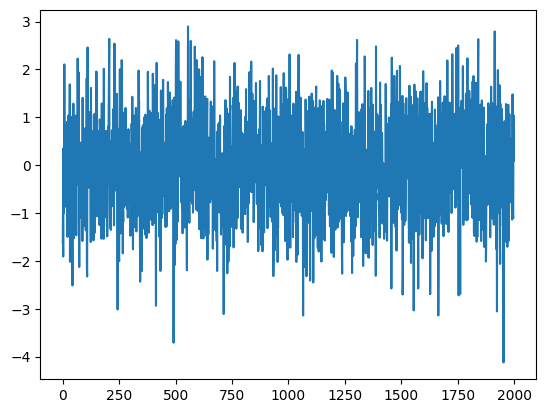

In [44]:
plt.plot(no_shift[0][0])
plt.show()

This has a constant variance of one.

In [45]:
alpha = 0.05
ACP = AdaptiveCP(alpha)

In [46]:
simple = ACP.NonAdaptive(no_shift[0], custom_interval=100)

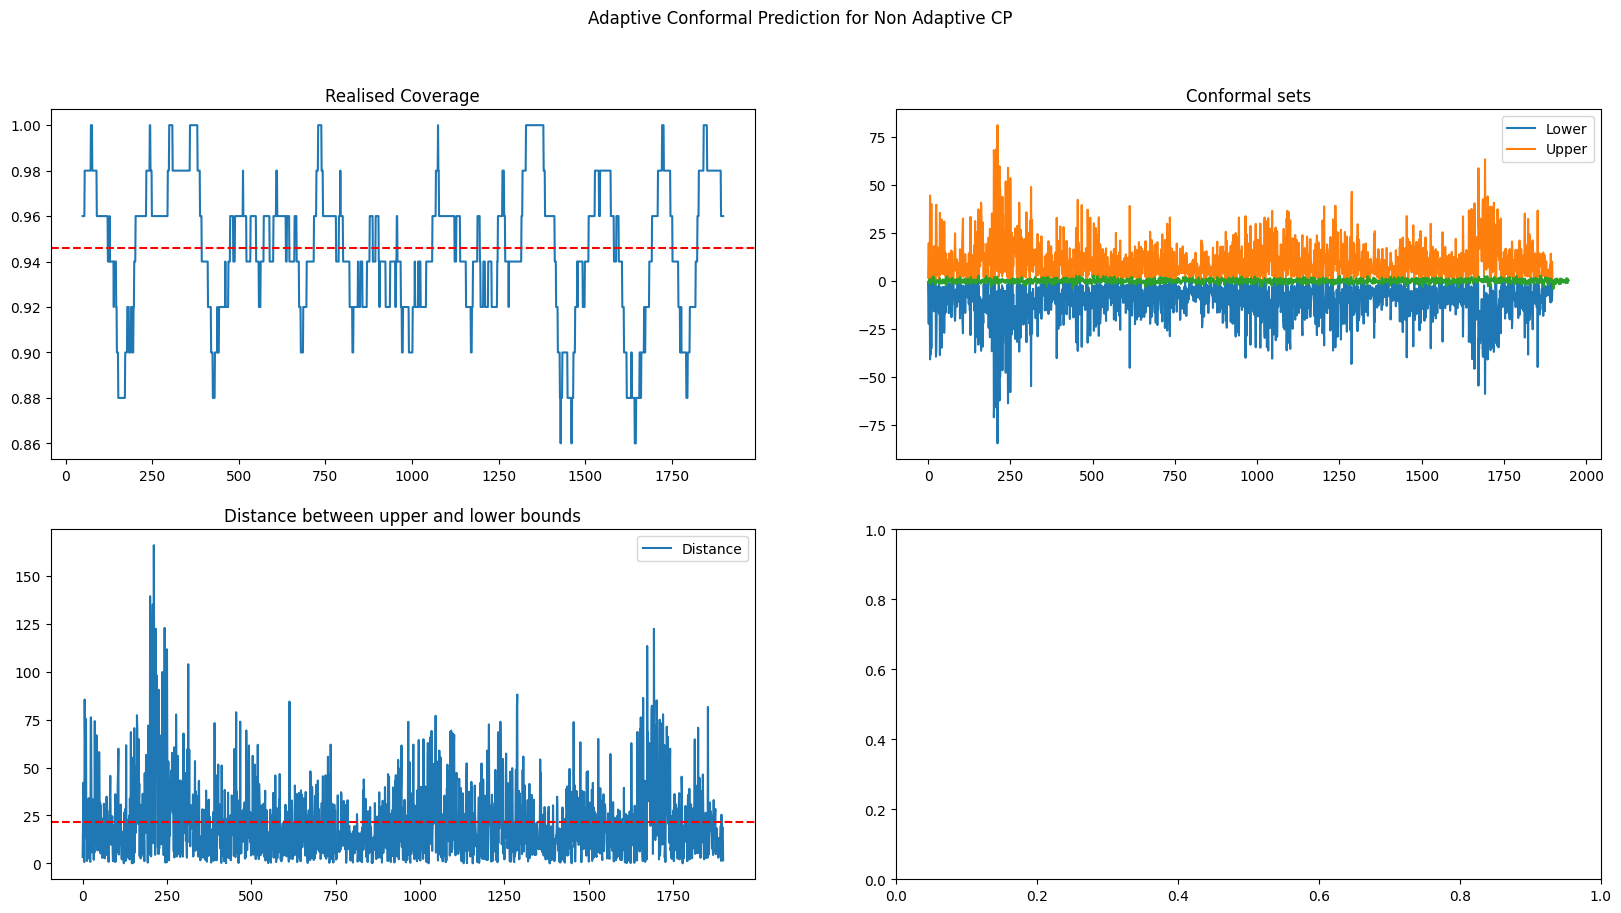

In [47]:
ACP_plots.one_plot(simple, no_shift[0][1])

In [48]:
# Consider Chebyshevs inequality is 
k = 4/9 * (1/alpha)**0.5
chebyshev = [(x-k, x+k) for x in no_shift[0][0]]

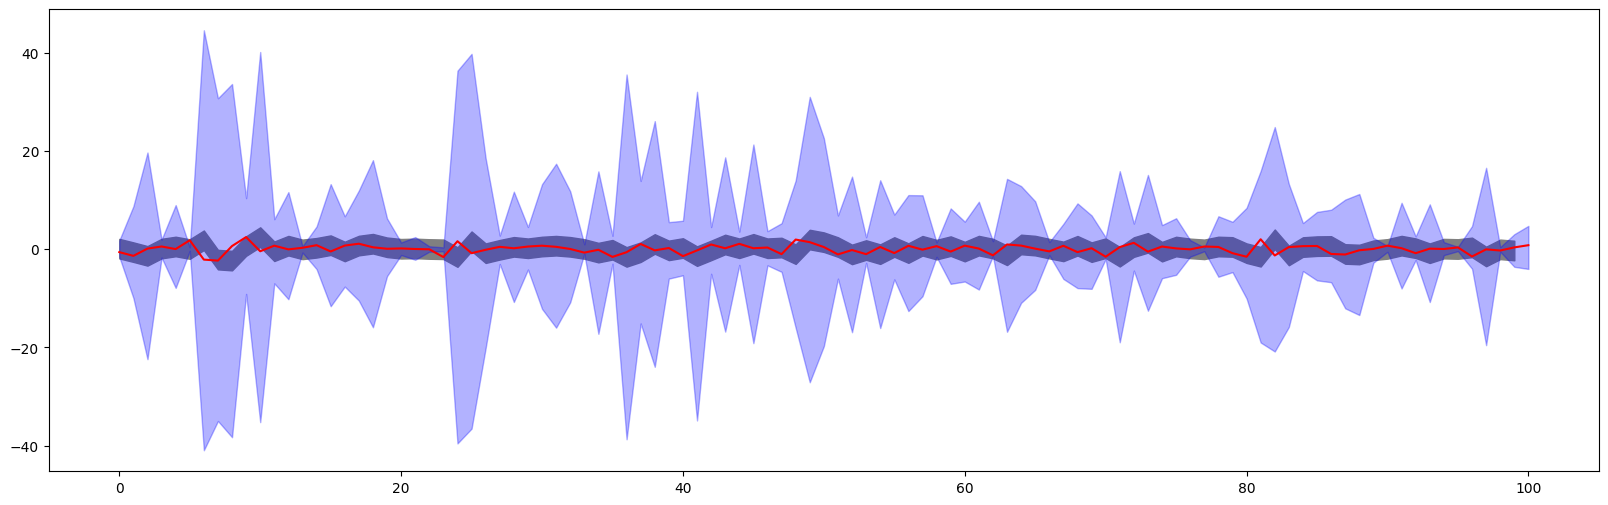

In [49]:
plt.figure(figsize=(20, 6))  # Adjust the figsize as per your requirement
plt.plot(no_shift[0][1][100:201], color='red')
up, low = zip(*chebyshev[100:200])
plt.fill_between(range(len(up)), up, low, alpha=1, color='gray')
sup, slo = zip(*simple['conformal_sets'][:101])
plt.fill_between(range(len(sup)), sup, slo, alpha=0.3, color='blue')
plt.show()

In [50]:
print(1-np.average([l<=x and x<=u for x, (l, u) in zip(no_shift[0][1], chebyshev)]))
print(1-np.average([l<x and x<u for x, (l, u) in zip(no_shift[0][1], simple['conformal_sets'])]))


# x -> starts at 0,
# Cheb: indice 0 is a prediction for 1.
# y, indice 0 is the acctual 1.

0.1420710355177589
0.0600315955766193


In [51]:
print(np.mean(simple['error_t_list']))

0.053712480252764615
